In [138]:
%matplotlib widget
import pyslim, msprime, tskit, random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG, display

#load tree sequence file, recapitate

ts = pyslim.load("/Users/alexanderwhitwam/Dropbox/university/research/space-trees/alex/mucrop.trees")
ts = ts.recapitate(recombination_rate = 1e-8, Ne=500)
#ts = pyslim.SlimTreeSequence(msprime.mutate(ts, rate=1e-7))

In [144]:
samps = random.sample(sorted(ts.individuals_alive_at(0)), 5)
snodes = []
for i in samps:
    snodes.append(ts.individuals()[i].nodes[0])
    snodes.append(ts.individuals()[i].nodes[1])
sts = ts.simplify(snodes, keep_input_roots = True)

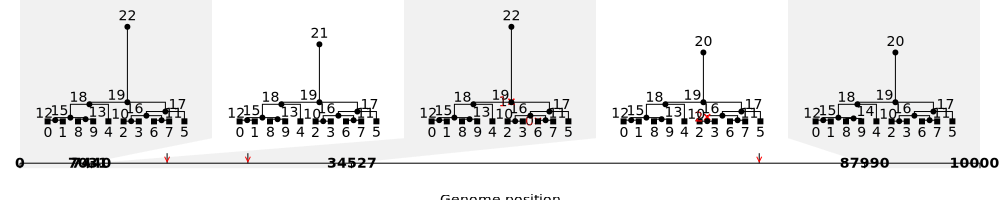

In [145]:
SVG(sts.draw_svg())

In [146]:
simpns = []
for i in range(0, 5):
    for n in sts.individual(i).nodes:
        simpns.append(n)

In [147]:
def ancestral_movement(tree):
    lists, simpis, ancestors, points, mutis = [], [], [], [], [] #lists of xyz coordinates for each individual, 
                                          #descendant & ancestral individuals in simplified ts
    for n in simpns:
        ind = sts.node(n).individual
        if ind not in simpis:
            simpis.append(ind)
        x = [sts.individual(ind).location[0]]
        y = [sts.individual(ind).location[1]]
        z = [sts.individual(ind).time]
        while tree.parent(n) != tskit.NULL and sts.node(tree.parent(n)).time < 2000:
            n = tree.parent(n)
            indi = sts.node(n).individual
            points.append(indi)
            if indi != -1:
                x.append(sts.individual(indi).location[0])
                y.append(sts.individual(indi).location[1])
                z.append(sts.individual(indi).time)
        lists.append([x, y, z])

    xan, yan, zan = [], [], []
    for n in tree.roots:
        i = sts.node(n).individual
        if i != -1:
            ancestors.append(i)
            xan.append(sts.individual(i).location[0])
            yan.append(sts.individual(i).location[1])
            zan.append(sts.individual(i).time)

    xde, yde, zde = [], [], []
    for i in simpis:
        xde.append(sts.individual(i).location[0])
        yde.append(sts.individual(i).location[1])
        zde.append(sts.individual(i).time)
        
    xm, ym, zm = [], [], []
    for mut in tree.mutations():
        ind = sts.node(mut.node).individual
        mutis.append(ind)
        if ind in points:
            xm.append(sts.individual(ind).location[0])
            ym.append(sts.individual(ind).location[1])
            zm.append(sts.individual(ind).time)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_zlim([2000, 0])

    for i in range(len(lists)):
        ax.plot(lists[i][0], lists[i][1], lists[i][2], color="black", linewidth=0.5)

    ax.scatter3D(xan, yan, zan, color="xkcd:sky blue")
    ax.scatter3D(xde, yde, zde, color="xkcd:orange")
    ax.scatter3D(xm, ym, zm, color="green")

In [160]:
# Iterate over the trees from left-to-right
tree = tskit.Tree(sts)
while tree.next():
    if tree.num_mutations > 0:
        ancestral_movement(tree)    

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

AttributeError: 'Tree' object has no attribute 'node'

In [110]:
tree = sts.last()
for mut in sts.mutations():
    print(mut.metadata['mutation_list'][0]['mutation_type'])
    g = sts.node(mut.node).individual
    print(sts.individual(g))

1
Individual(id=509, flags=131072, location=array([0.2312405 , 0.01083174, 0.        ]), parents=array([], dtype=int32), nodes=array([907], dtype=int32), metadata={'pedigree_id': 103655, 'age': 0, 'subpopulation': 1, 'sex': -1, 'flags': 0})
2
Individual(id=1169, flags=131072, location=array([0.7380567 , 0.05273242, 0.        ]), parents=array([], dtype=int32), nodes=array([245], dtype=int32), metadata={'pedigree_id': 206124, 'age': 0, 'subpopulation': 1, 'sex': -1, 'flags': 0})
1
Individual(id=398, flags=131072, location=array([0.29464938, 0.96749162, 0.        ]), parents=array([], dtype=int32), nodes=array([1018], dtype=int32), metadata={'pedigree_id': 86298, 'age': 0, 'subpopulation': 1, 'sex': -1, 'flags': 0})


In [157]:
print(sts.first().roots)
sts.node(20)

[22]


Node(id=20, flags=0, time=2067.4867723700518, population=0, individual=-1, metadata=None)

In [162]:
sts.last().get_parent(3)
sts.last().parent(3)

10